### Miscellaneous

AND:
    AND(0, 0) = 0	a(wx+b) = 0.11 ✔
    AND(0, 1) = 0	a(wx+b) = 0.3 ✔
    AND(1, 0) = 0	a(wx+b) = 0.3 ✔
    AND(1, 1) = 1	a(wx+b) = 0.6 ✔
OR:
    OR(0, 0) = 0	a(wx+b) = 0.39 ✔
    OR(0, 1) = 1	a(wx+b) = 0.79 ✔
    OR(1, 0) = 1	a(wx+b) = 0.79 ✔
    OR(1, 1) = 1	a(wx+b) = 0.96 ✔
NAND:
    NAND(0, 0) = 1	a(wx+b) = 0.53 ✔
    NAND(0, 1) = 0	a(wx+b) = 0.22 ✔
    NAND(1, 0) = 0	a(wx+b) = 0.22 ✔
    NAND(1, 1) = 0	a(wx+b) = 0.07 ✔
XOR:
    XOR(0, 0) = 0	a(wx+b) = 0.45 ✔
    XOR(0, 1) = 1 ≠ 0	a(wx+b) = 0.49 𐄂
    XOR(1, 0) = 1 ≠ 0	a(wx+b) = 0.49 𐄂
    XOR(1, 1) = 0 ≠ 1	a(wx+b) = 0.54 𐄂
AND:
    AND(0, 0) = 0	a(wx+b) = -0.24 ✔
    AND(0, 1) = 0	a(wx+b) = 0.25 ✔
    AND(1, 0) = 0	a(wx+b) = 0.25 ✔
    AND(1, 1) = 1	a(wx+b) = 0.75 ✔
OR:
    OR(0, 0) = 0	a(wx+b) = 0.25 ✔
    OR(0, 1) = 1	a(wx+b) = 0.75 ✔
    OR(1, 0) = 1	a(wx+b) = 0.75 ✔
    OR(1, 1) = 1	a(wx+b) = 1.24 ✔
NAND:
    NAND(0, 0) = 1	a(wx+b) = 0.72 ✔
    NAND(0, 1) = 0	a(wx+b) = 0.25 ✔
    NAND(1, 0) = 0	a(wx+b) = 0.25 ✔
    NAND(1,

Step Length,Min Epochs,Weight,Bias
0.01,2500,"(0.71, 0.71)",-1.19
0.05,500,"(0.71, 0.71)",-1.17
0.1,250,"(0.71, 0.71)",-1.18
0.5,50,"(0.72, 0.7)",-1.15
1,25,"(0.72, 0.69)",-1.09
5,10,"(0.76, 0.65)",-0.88


Step Length,Min Epochs,Weight,Bias
0.01,1000,"(-0.71, -0.71)",0.23
0.05,250,"(-0.7, -0.71)",0.3
0.1,100,"(-0.7, -0.71)",0.25
0.5,25,"(-0.68, -0.74)",0.25
1,10,"(-0.62, -0.78)",0.24


Step Length,Min Epochs,Weight,Bias
0.01,1000,"(-0.71, -0.71)",0.18
0.05,250,"(-0.71, -0.71)",0.2
0.1,100,"(-0.7, -0.71)",0.19
0.5,25,"(-0.7, -0.72)",0.24
1,25,"(-0.7, -0.71)",0.28
5,10,"(-0.69, -0.72)",0.3


Step Length,Min Epochs,Weight,Bias
0.01,250,"(0.71, 0.71)",0.51
0.05,50,"(0.7, 0.72)",0.4
0.1,25,"(0.69, 0.73)",0.41


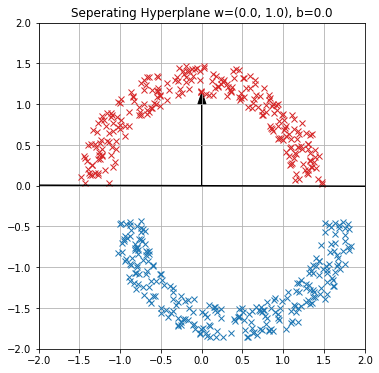

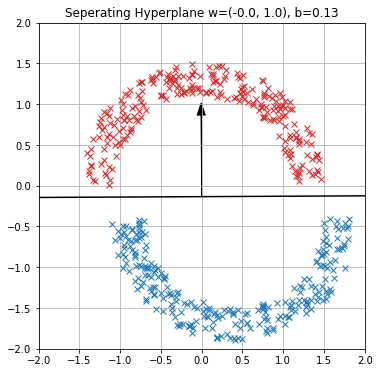

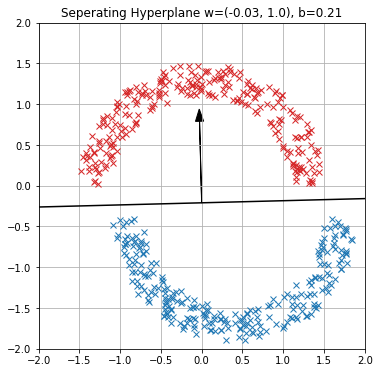

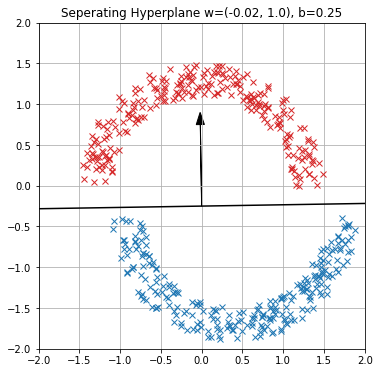

In [34]:
%run delta_rule.ipynb

In [4]:
A0, A1, T = get_annulus_test_data(n=n)
C0, C1 = [a(dotprod(w, x) + b) for x in A0], [a(dotprod(w, x) + b) for x in A1]

min0, max0, min1, max1 = min(C0), max(C0), min(C1), max(C1)

c0 = min0 + 0.5 * (max0 - min0)
c1 = min1 + 0.5 * (max1 - min1)
d = c0 + 0.5 * (c1 - c0)

print(f"A0:	{_rnd(min0)}	{_rnd(max0)}	{_rnd(c0)}")
print(f"A1:	{_rnd(min1)}	{_rnd(max1)}	{_rnd(c1)}")
print(f"MEDIAN:	{_rnd(d)}")

# offset = d
# a, da, classify = relu, dx_relu, lambda x: heaviside(x, offset=offset)

# w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
# plot_annulus_classification(A0, A1,  w, b - offset)

A0:	0.52	1.26	0.89
A1:	0.0	0.38	0.19
MEDIAN:	0.54


In [7]:
def verify_annulus_classification(a, A0, A1, w, b, classify=heaviside):
    for x in A0:
        if not classify(dotprod(w, x) + b) == 1:
            r = dotprod(w, x) + b
            print(f"A0: {r}")
            assert classify(dotprod(w, x) + b) == 1
    for x in A1:
        if not classify(dotprod(w, x) + b) == 0:
            r = dotprod(w, x) + b
            print(f"A1: {r}")
            assert classify(dotprod(w, x) + b) == 0
#     assert all(classify(dotprod(w, x) + b) == 1 for x in A0) and all(classify(dotprod(w, x) + b) == 0 for x in A1)


n = 250
s, epochs = 0.01, 25
offset = 0.42
a, da, classify = relu, dx_relu, lambda x: heaviside(x, offset=offset)
repetitions = 250

for i in range(repetitions):
    A0, A1, T = get_annulus_test_data(n=n)
    w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
    try:
        verify_annulus_classification(a, A0, A1, w, b, classify=classify)
    except AssertionError:
        print(f"{i}/{repetitions}")
        raise
print("ok")

ok


In [33]:
n = 250
s, epochs = 0.01, 50
offset = 0.42
a, da, classify = relu, dx_relu, lambda x: heaviside(x, offset=offset)
repetitions = 250

for i in range(repetitions):
    A0, A1, T = get_annulus_test_data(n=n)
    w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
    try:
        verify_annulus_classification(a, A0, A1, w, b, classify=classify)
    except AssertionError:
        print(f"{i}/{repetitions}")
        raise
print("ok")

ok
